# Churn Case Study

## Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]


<img src="https://images.pexels.com/photos/3078/home-dialer-siemens-telephone.jpg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" style="width:400px">

**Client**: Telco Company in the USA offering triple play (phone, internet and TV).

New competitor entered offering triple play, resulting in increased churn.

Want better way to spot potential churning customers and suggested actions what to do.

## **Assignment**

- Define the business problem
- Determine which evaluation metric you find appropriate:
   - accuracy
   - precision
   - recall
   - f1 score
- Determine which type of slice/segment/type of churn you are interested
- Run "data prep code"
- Use logistic regression to create 2-3 model specifications
  - model 1 (vanilla model): uses cleaned data as is, find best cutoff using chosen metric
  - model 2: create at least **2 new features** and add them to the model
  - model 3 (if time, a 'reach' model): increase the LASSO penalty to decrease the feature set
- Pick the "best" model and find the "best" threshold
- Use "best" model to identify the drivers of churn in your segment analysis and make recommendations for the company
- Each group will have 5 minutes to present their recommendations to the rest of the class. Make sure to share:
   - segment you chose
   - evaluation metric you chose based on the business problem
   - evaluation metric of "best" model's threshold & threshold
   - what drives churn and what are your recommendations
   - **if you had more time** what would you work on?

## Data

<img src="https://images.pexels.com/photos/53621/calculator-calculation-insurance-finance-53621.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" style = "width:400px" >
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information 
     - how long they’ve been a customer (tenure is in months)
     - contract, payment method, paperless billing, monthly charges, and total charges
     - all "totals" are over the length of the contract
- Demographic info about customers – gender, age range, and if they have partners and dependents
- Usage
    - information about their usage patterns
    - again, usage totals are over length of contract

## Concept: Churn

#### Type of churn:

**Voluntary** – they left after contract was up

**Involuntary** – we fired them

**Early churn** – left early, broke contract

### Churn is a survival problem:
- Predicting who will churn next month is really hard
- Predicting who may churn over next 3 months is easier

<img src = "./img/funnel.png" style="width:800px">

There are many reasons to churn &#8594; **feature engineering is king**

### Solutions need to be tied to root problems

<img src = "./img/solution.png" style="width:800px">

### Different solutions have different time frames

<img src = "./img/time.png" style="width:800px">

## Remember:

#### You will not be paid to create intricate models
### You will be paid to **Solve Problems**

# Get Started!

## Part 1: Business problem

#### End Users: Telco leadership, customers



#### True business problem: Identify potential churning customers and suggested actions what to do



#### Context:

- **False negative** Fail to ID customers that are actually churning
    - **Outcome**: High churn rate (v bad)
- **False positive** ID customers that aren't actually churning 
    - **Outcome**: Invest in customers that aren't flight risk - maybe lose some money on customers you didnt need ton invest in + losing money on churn
    
False negative is worse - want low FN so high Recall

## Part 2: Evaluation Metric
Which metric (of the ones we've explore so far) would make sense to primarily use as we evaluate our models?

- Accuracy
- Precision
- Recall******
- F1-Score

## Part 3: Segment choice

What type slice/segment/type of churn you are interested in?
Tipping point? Expect some frustration but if can avoid tipping point? also probably larger more fixable problems

The customers that as a whole were going to get the most money from. The most profitable segment accounting for CAC and retention

## Part 4: Data Prep Code

In [144]:
# Import pacakges
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler
# Load dataset
url_link = 'https://docs.google.com/spreadsheets/d/1TAWfdKnWYiCzKUeDyGL6NzIOv7AxFt_Sfzzax464_FQ/export?format=csv&gid=882919979'
telco = pd.read_csv(url_link)

# Drop nas
telco.dropna(inplace=True)

# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(telco.drop(columns=['customerID','Churn']), np.where(telco.Churn =="Yes", 1, 0), test_size=0.33, random_state=42)

# Separate out numeric from categorical variables
cat_var = telco.select_dtypes(include='object')
cat_var.drop(columns=['customerID','Churn'], inplace = True)

num_var = telco.select_dtypes(exclude = 'object') 

# Encode categorical variables
ohc = OneHotEncoder(drop='first')
encoded_cat = ohc.fit_transform(X_train[cat_var.columns.tolist()]).toarray()

scaler = MinMaxScaler()
X_train_scale_num = scaler.fit_transform(X_train[num_var.columns])
X_train_scale_num = pd.DataFrame(X_train_scale_num)
X_train_scale_num.columns = num_var.columns


# Add feature names to encoded vars
encoded=pd.DataFrame(encoded_cat, columns=ohc.get_feature_names(cat_var.columns.tolist()))
encoded.reset_index(inplace=True, drop=True)
X_train.reset_index(inplace=True, drop=True)

# Reassemble entire training dataset
clean_X_train = pd.concat([pd.DataFrame(X_train_scale_num) , encoded], axis=1,  sort=False)
clean_X_train.shape


encoded_cat = ohc.transform(X_test[cat_var.columns.tolist()]).toarray()
X_test_scale_num = scaler.transform(X_test[num_var.columns])
X_test_scale_num = pd.DataFrame(X_test_scale_num)
X_test_scale_num.columns = num_var.columns


# Add feature names to encoded vars
encoded=pd.DataFrame(encoded_cat, columns=ohc.get_feature_names(cat_var.columns.tolist()))
encoded.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
# Reassemble entire training dataset
clean_X_test = pd.concat([pd.DataFrame(X_test_scale_num) , encoded], axis=1,  sort=False)





/Users/kcahlers/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [145]:
clean_X_test

,SeniorCitizen,tenure,NumbervMailMessages,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternationalPlan_Yes,VoiceMailPlan_Yes
0,0.0,0.760563,0.274510,0.412918,0.600000,0.417143,0.416667,0.553108,0.309859,0.580,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.507042,0.000000,0.548731,0.593939,0.666165,0.257576,0.550321,0.450704,0.360,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.042254,0.000000,0.306805,0.430303,0.628271,0.356061,0.347087,0.570423,0.265,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.887324,0.647059,0.256055,0.630303,0.235789,0.439394,0.416783,0.521127,0.355,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.112676,0.000000,0.491638,0.624242,0.670977,0.310606,0.485364,0.739437,0.525,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,0.0,0.957746,0.000000,0.485006,0.557576,0.581955,0.484848,0.407862,0.464789,0.645,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1095,1.0,0.830986,0.000000,0.587659,0.515152,0.170226,0.560606,0.398662,0.626761,0.585,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1096,1.0,0.014085,0.000000,0.612168,0.648485,0.593083,0.507576,0.390577,0.584507,0.385,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1097,0.0,0.563380,0.000000,0.440888,0.490909,0.677895,0.348485,0.419292,0.556338,0.265,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


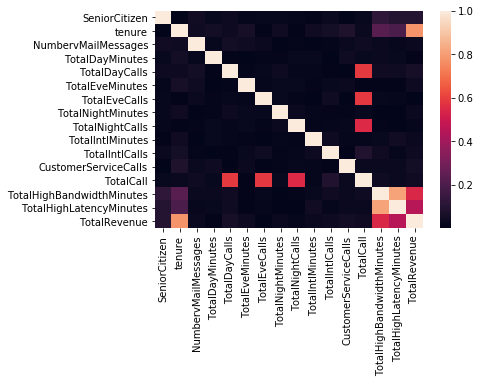

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(X_train.corr().abs())

# 0.877

In [147]:
y_test

array([0, 0, 1, ..., 0, 0, 0])

## Part 5: Create models

In [148]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Vanilla Model

In [156]:
df_y_train = pd.DataFrame(y_train)
df_y_train.columns = ['churn']
df_y_test = pd.DataFrame(y_test)
df_y_test.columns = ['churn']
all_churn = (len(df_y_train.loc[df_y_train['churn']==1])+len(df_y_test.loc[df_y_test['churn']==1]))/(len(y_train)+len(y_test))
no_churn = 1-all_churn

print(f" If predicted everyone churned we would be accurate {all_churn:.3f}")
print(f" If predicted nobody churned we would be accurate {no_churn:.3f}")

 If predicted everyone churned we would be accurate 0.196
 If predicted nobody churned we would be accurate 0.804


# Model v1

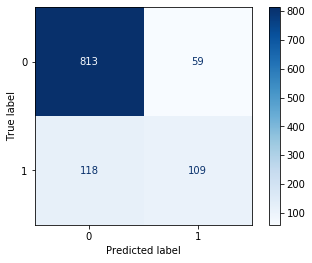

In [157]:
logreg=LogisticRegression()
logreg.fit(clean_X_train, y_train)
y_pred_train = logreg.predict(clean_X_train)
y_pred_test = logreg.predict(clean_X_test)
plot_confusion_matrix(logreg,clean_X_test, y_test, 
                      cmap=plt.cm.Blues, # Changing the color scheme
                      values_format=".3g")

In [158]:
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric(y_train, y_pred_train):.4f}")
    print(f"TEST: {metric(y_test, y_pred_test):.4f}")
    print("*" * 15)

Accuracy:
TRAIN: 0.8654
TEST: 0.8389
***************
Recall:
TRAIN: 0.5188
TEST: 0.4802
***************
Precision:
TRAIN: 0.6994
TEST: 0.6488
***************
F1-Score:
TRAIN: 0.5957
TEST: 0.5519
***************


# Model v2 - balance does nothing for me but crushes Kyles

Accuracy:
TRAIN: 0.8143
TEST: 0.8089
***************
Recall:
TRAIN: 0.8638
TEST: 0.8634
***************
Precision:
TRAIN: 0.5083
TEST: 0.5227
***************
F1-Score:
TRAIN: 0.6400
TEST: 0.6512
***************


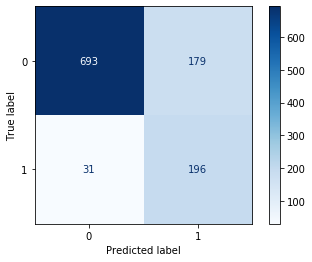

In [180]:
logreg=LogisticRegression(class_weight='balanced')
logreg.fit(clean_X_train, y_train)
y_pred_train = logreg.predict(clean_X_train)
y_pred_test = logreg.predict(clean_X_test)
plot_confusion_matrix(logreg,clean_X_test, y_test, 
                      cmap=plt.cm.Blues, # Changing the color scheme
                      values_format=".3g")
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric(y_train, y_pred_train):.4f}")
    print(f"TEST: {metric(y_test, y_pred_test):.4f}")
    print("*" * 15)

# Model v3 - lasso minimally helpful

Accuracy:
TRAIN: 0.8668
TEST: 0.8453
***************
Recall:
TRAIN: 0.5258
TEST: 0.5022
***************
Precision:
TRAIN: 0.7022
TEST: 0.6667
***************
F1-Score:
TRAIN: 0.6013
TEST: 0.5729
***************


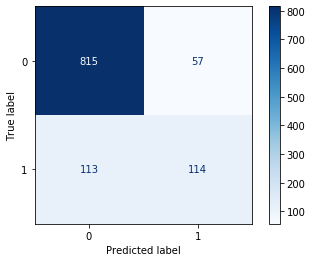

In [161]:
logreg=LogisticRegression(penalty='l1', solver='liblinear')
logreg.fit(clean_X_train, y_train)
y_pred_train = logreg.predict(clean_X_train)
y_pred_test = logreg.predict(clean_X_test)
plot_confusion_matrix(logreg,clean_X_test, y_test, 
                      cmap=plt.cm.Blues, # Changing the color scheme
                      values_format=".3g")
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric(y_train, y_pred_train):.4f}")
    print(f"TEST: {metric(y_test, y_pred_test):.4f}")
    print("*" * 15)

# Model v4 - ridge worse than lasso

Accuracy:
TRAIN: 0.8156
TEST: 0.8116
***************
Recall:
TRAIN: 0.8756
TEST: 0.8722
***************
Precision:
TRAIN: 0.5103
TEST: 0.5266
***************
F1-Score:
TRAIN: 0.6448
TEST: 0.6567
***************


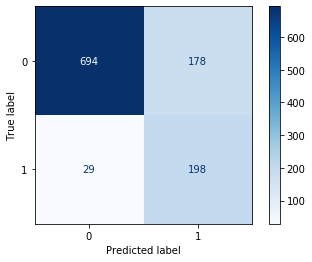

In [181]:
logreg=LogisticRegression(penalty='l1', solver='liblinear',class_weight='balanced' )
logreg.fit(clean_X_train, y_train)
y_pred_train = logreg.predict(clean_X_train)
y_pred_test = logreg.predict(clean_X_test)
plot_confusion_matrix(logreg,clean_X_test, y_test, 
                      cmap=plt.cm.Blues, # Changing the color scheme
                      values_format=".3g")
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric(y_train, y_pred_train):.4f}")
    print(f"TEST: {metric(y_test, y_pred_test):.4f}")
    print("*" * 15)

# Model v5 - skeleton - tenure+highbandwidth - better but still not Kyle level

In [164]:
skeleton=['tenure','TotalHighBandwidthMinutes']
X_train_skeleton=clean_X_train[skeleton]
X_test_skeleton=clean_X_test[skeleton]

Accuracy:
TRAIN: 0.6303
TEST: 0.6306
***************
Recall:
TRAIN: 0.7535
TEST: 0.7621
***************
Precision:
TRAIN: 0.3087
TEST: 0.3295
***************
F1-Score:
TRAIN: 0.4379
TEST: 0.4601
***************


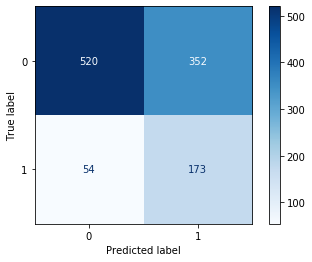

In [167]:
logreg=LogisticRegression(penalty='l2', solver='liblinear',class_weight='balanced')
logreg.fit(X_train_skeleton, y_train)
y_pred_train = logreg.predict(X_train_skeleton)
y_pred_test = logreg.predict(X_test_skeleton)
plot_confusion_matrix(logreg,X_test_skeleton, y_test, 
                      cmap=plt.cm.Blues, # Changing the color scheme
                      values_format=".3g")
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric(y_train, y_pred_train):.4f}")
    print(f"TEST: {metric(y_test, y_pred_test):.4f}")
    print("*" * 15)

In [179]:
coeff = []
y_test
for n,x in clean_X_test:
    corrcoef = np.corrcoef(clean_X_test.x, y_test)
    coeff[n].append(corrcoef)
    
print (coeff)

ValueError: too many values to unpack (expected 2)

## Part 6: Pick model & find best threshold

## Part 7: What drives churn?

## Part 8: What are your recommendations?